<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_14_Matplotlib Pie Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 🟩 Health Insurance Pie Chart (2.14.1)

In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


job_health_insurance
False    37394
True      4556
Name: count, dtype: int64

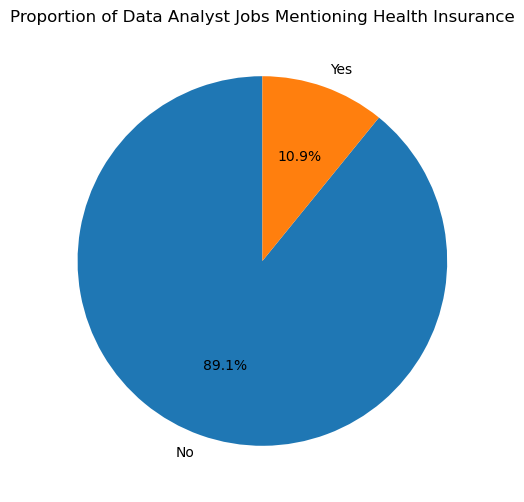

In [8]:
df_DA = df[df["job_title"]=="Data Analyst"].copy()
health_insurance = df_DA["job_health_insurance"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(health_insurance, labels=["No","Yes"], autopct="%1.1f%%" ,startangle=90)
plt.title("Proportion of Data Analyst Jobs Mentioning Health Insurance")
health_insurance

---

## 🟨 Job Schedule Distribution (2.14.2)

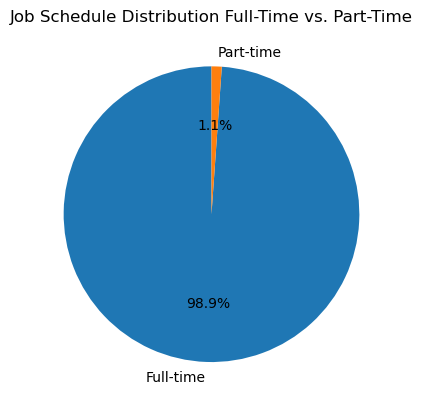

In [31]:
df_ft_pt = df[(df["job_schedule_type"] == "Full-time") | (df["job_schedule_type"] == "Part-time")].copy()
#df_ft_pt = df[df["job_schedule_type"].isin(["Full-time", "Part-time"])]
job_counts = df_ft_pt["job_schedule_type"].value_counts()
job_counts
plt.pie(job_counts, labels=job_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Job Schedule Distribution Full-Time vs. Part-Time")
plt.show()



---

## 🟥 Degree Mentioned Pie Chart (2.14.3)

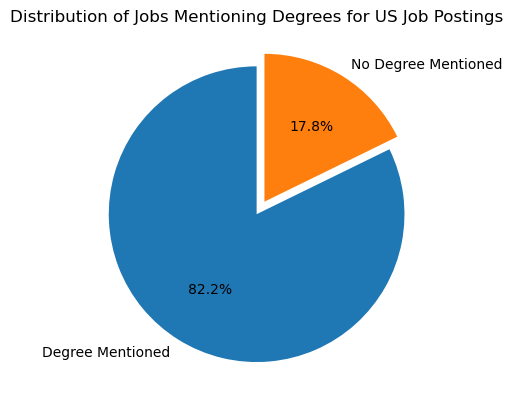

In [ ]:
df_US = df[df["job_country"] == "United States"].copy()
degree_counts = df_US["job_no_degree_mention"].value_counts()
plt.pie(degree_counts, labels=["Degree Mentioned", "No Degree Mentioned"], autopct="%1.1f%%", startangle=90, explode=(0, 0.1))
#explode parametresi, pie chart’ta bir dilimi dışarı doğru “patlatmak” (vurgulamak) için kullanılır.
#dilimi yerinde bırakır (0), dilimi biraz dışarı taşır (0.1 oranında).
plt.title("Distribution of Jobs Mentioning Degrees for US Job Postings")
plt.show()

Aşağıdaki yanlış çözüm

job_no_degree_mention
False    6865
True      589
Name: count, dtype: int64

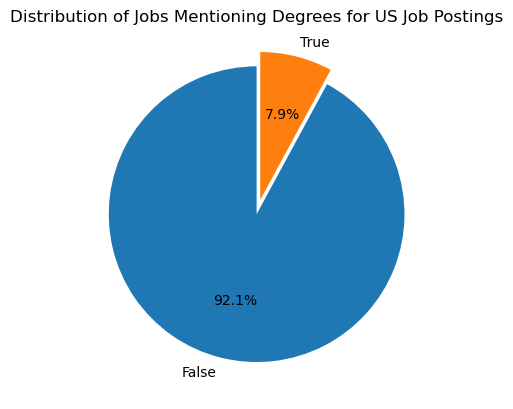

In [41]:
df_US = df[df["job_location"] == "United States"].copy()
mention = df_US["job_no_degree_mention"].value_counts()
#mention_exploded = mention.explode("job_no_degree_mention")
plt.pie(mention, labels=["False","True"], autopct="%1.1f%%", startangle=90, explode=(0,0.1))
plt.title("Distribution of Jobs Mentioning Degrees for US Job Postings")
mention

---